In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('spam_dataset.csv')

In [3]:
df.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [6]:
len(df)

1000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
 1   is_spam          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
missing_data = df.isnull().sum()
print(missing_data)

message_content    0
is_spam            0
dtype: int64


In [9]:
duplicated_data = df.duplicated().sum()
print(duplicated_data)

323


In [10]:
df = df.drop_duplicates()

In [11]:
duplicated_data = df.duplicated().sum()
print(duplicated_data)

0


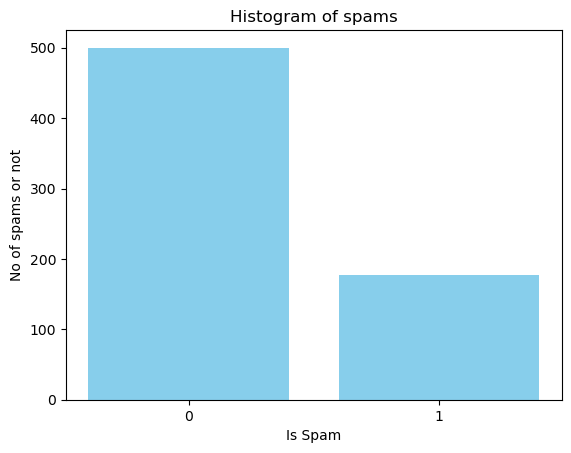

In [27]:
spam_counts = df['is_spam'].value_counts()
plt.bar(spam_counts.index, spam_counts.values, color='skyblue')
plt.xticks([0,1], labels=['0','1'])
plt.xlabel('Is Spam')
plt.ylabel('No of spams or not')
plt.title('Histogram of spams')
plt.show()

### Split the dataset

In [35]:
X = df['message_content']
y = df['is_spam']

In [38]:
import re
import string

def pre_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df['message_content'] = df['message_content'].apply(pre_text)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(preprocessor=pre_text)
X = vectorizer.fit_transform(df['message_content']).toarray()

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [47]:
y_pred = classifier.predict(X_test)
print(f'Confussion Matrix is: \n {confusion_matrix(y_test, y_pred)}')
print(f'\n\n Accuracy score is: \n {accuracy_score(y_test,y_pred)}')
print(f'\n\nClassification Report is: \n {classification_report(y_test, y_pred)}')


Confussion Matrix is: 
 [[94  0]
 [ 0 42]]


 Accuracy score is: 
 1.0


Classification Report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        42

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

